In [ ]:
'''
Luiz Soares Neto
ICAT/UFAL
luizsneto211@gmail.com
luiz.neto@icat.ufal.br
Last updated on april 02, 2025
'''

In [ ]:
######################################################## ANOTAÇÕES E AVISOS ######################################################## 

'''
Utilizei os arquivos recomendados, baixados do MERGE no formato GRIB2. 
No entanto, o método empregado para realizar a soma dos valores resultou
em um arquivo no formato NetCDF (.nc). Diante disso, optei por manter essa 
estrutura e proceder com a plotagem a partir do arquivo .nc, pois achei o 
formato NetCDF mais fácil de manipular, facilitando o processamento e a plotagem dos dados.

###############################################################################################################

Caso as bibliotecas necessárias para a execução do script não estejam instaladas em sua máquina,
utilize os seguintes comandos para realizar a instalação:

pip install requests
pip install xarray
pip install matplotlib
pip install numpy
pip install cartopy
pip install geopandas

'''

In [2]:
########################################### BIBLIOTECAS UTILIZADAS ###########################################
import os # Manipulação de arquivos e pastas
import xarray as xr  # Manipulação de dados NetCDF e GRIB
import matplotlib.pyplot as plt  # Criação dos gráficos e visualizações de dados
import numpy as np  # Operações matemáticas e manipulação de arrays
import cartopy.crs as ccrs  # Trabalhar com sistemas de coordenadas geográficas
import cartopy.feature as cfeature  # Adicionar elementos geográficos (rios, países, etc.) aos mapas
import geopandas as gpd  # Manipulação e análise de dados geoespaciais com Pandas
import matplotlib.colors as mcolors  # Gerenciar as cores para visualizações no Matplotlib

In [3]:
# Adicionando o caminho onde os arquivos foram baixados anteriormente
diretorio_dados = (r"C:\Users\luizs\Scripts_Estagio_Ampere\Script_Exercicios_1_2\dados\2025\03")

# Usei o sistema de condições pra fazer algumas verificações e buscar os arquivos que vão ser utilizados.
# Se o diretório que foi indicado acima não existir, simplesmente o script se encerra
if not os.path.isdir(diretorio_dados):
    print("Diretório inválido. Encerrando o script.")
    exit()

# Listando todos os arquivos .grib2 no diretório
arquivos_grib = [f for f in os.listdir(diretorio_dados) if f.endswith(".grib2")]

# Se não tiver arquivo do tipo grib no diretório o script também se encerra
if not arquivos_grib:
    print("Nenhum arquivo .grib2 encontrado no diretório.")
    exit()

# Após as condições acima terem sido satisfeitas é dada continuidade no script
# Iniciar o calculo do acumulado a partir do 0 que seria o "None"
acumulado = None

# Nessa etapa os arquivos grib da pasta vão ser verificados
# e apenas os com a variável "prec" vão ser utilizados nas estapas seguintes.
#### Isso é bem interessante quando tiver trabalhando com mais de uma variável, que não é o caso ####
for arquivo in arquivos_grib:
    caminho_arquivo = os.path.join(diretorio_dados, arquivo)
    ds = xr.open_dataset(caminho_arquivo, engine='cfgrib')
    
    if 'prec' not in ds:
        print(f"Variável 'prec' não encontrada em {arquivo}. Pulando este arquivo.")
        continue
    # Esse if vai servir pro primeiro arquivo, quando o acumulado ainda era zero
    # e vai passar a ser o valor do primeiro arquivo, já que ainda não precisa somar
    if acumulado is None:
        acumulado = ds['prec']
    # Nessa parte o valores de acumulado serão sempre somados aos arquivos seguintes
    # até que não tenha mais arquivos para somar
    else:
        acumulado += ds['prec']

# Por fim o valor de acumulado não sendo 0 será printado e salvo no formato netcdf (.nc)
if acumulado is not None:
    print(acumulado.values)

    # Salvar o arquivo acumulado em formato .nc
    caminho_acumulado_nc = os.path.join(diretorio_dados, "prec_acumulada")
    acumulado.to_dataset(name='prec').to_netcdf(caminho_acumulado_nc)
    print(f"Arquivo acumulado salvo como .nc em: {caminho_acumulado_nc}")
else:
    print("Nenhum dado válido encontrado para salvar.")


c:\Users\luizs\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,
c:\Users\luizs\anaconda\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\luizs\anaconda\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
c:\Users\luizs\anaconda\Lib\site-packages\cfgrib\xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedel

[[ 4.875   2.75    2.25   ... 14.3125 14.6875 14.0625]
 [ 2.25    2.125   2.4375 ... 14.3125 15.0625 14.8125]
 [ 2.875   2.8125  3.0625 ... 14.0625 15.25   14.75  ]
 ...
 [ 3.875   4.1875  4.3125 ... 11.25   11.375  12.125 ]
 [ 3.4375  3.5     3.875  ... 10.25   11.375  11.5   ]
 [ 2.875   4.125   4.125  ... 12.4375 13.1875 11.25  ]]
Arquivo acumulado salvo como .nc em: C:\Users\luizs\Scripts_Estagio_Ampere\Script_Exercicios_1_2\dados\2025\03\prec_acumulada


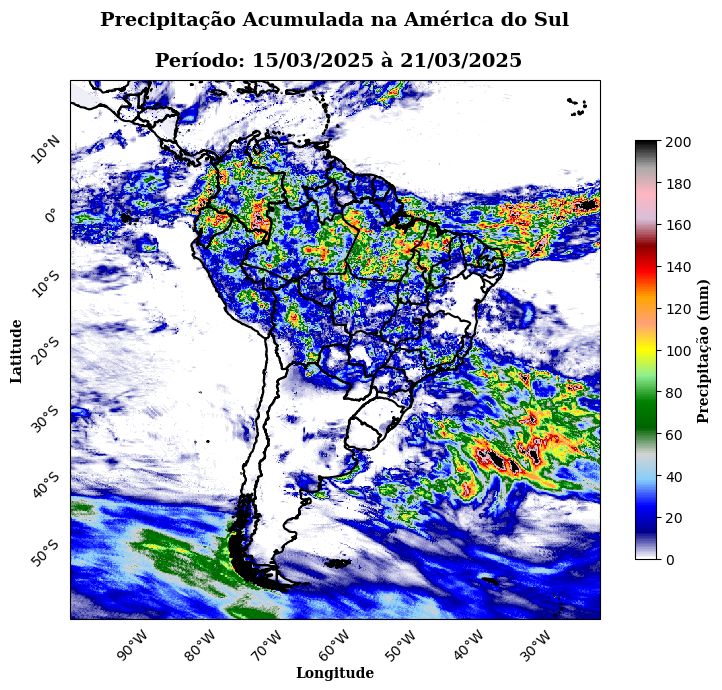

In [5]:
############################################## OBSERVAÇÃO IMPORTANTE ##############################################
''' Após gerar o arquivo de precipitação acumulada, ele será salvo no diretório dos dados grib que foram baixados anteriormente.
    Para continuar e realizar a plotagem, é necessário movê-lo para o diretório principal, onde está o script.''' 

# Pra essa plotagem eu usei as mesmas cores usadas pelo o INMET nesse tipo de mapa
cores = [
    "white", "darkblue", "blue", "lightskyblue", "lightgray",
    "darkgreen", "green", "lightgreen", "yellow", "lightsalmon",
    "orange", "red", "darkred", "thistle", "lightpink",
    "darkgray", "black"
]

# Criei um cmap com as cores acima
cmap_custom = mcolors.LinearSegmentedColormap.from_list("minha_paleta", cores, N=256)

# Aqui começou a plotagem de fato, carreguei o arquivo
ds = xr.load_dataset('prec_acumulada', decode_timedelta=False) # Trocar pelo Relative Path do seu arquivo

# Peguei o shapefile do Brasil
# Obs: O shapefile tem que estar na mesma pasta do script, então deixei todos os arquivos juntos
shapefile = 'ne_10m_admin_0_countries_bra.shp'
gdf = gpd.read_file(shapefile)

# Criando a figura base pra plotagem
# Usando a biblioteca cartopy pra plotar a projeção 
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# Plotar dados de precipitação com a paleta personalizada
prec = 'prec'
vmin, vmax = 0, 200 # Ajustei os valores de precipitação pra deixar as cores bem destacadas

# Tirei a colobar padrão pois vou adicionar outra depois
img = ds[prec].plot(cmap=cmap_custom, vmin=vmin, vmax=vmax, add_colorbar=False, transform=ccrs.PlateCarree())

# Detalhe estético, mudei a fonte da escrita e deixei em negrito
fonte_titulo = {
    'fontsize': 14,    # Tamanho da fonte
    'fontweight': 'bold',  # Deixar o título em negrito
    'family': 'serif',  # Tipo de fonte 
    'color': 'black'   # Cor do texto
}

fonte_resto = {
    'fontsize': 10,    
    'fontweight': 'bold',  
    'family': 'serif',  
    'color': 'black'   
}

# Adicionei a colorbar nova, com algumas modificações estéticas 
cbar = plt.colorbar(img, ax=ax,ticks=np.arange(vmin, vmax + 1, 20), orientation='vertical', fraction=0.030, pad=0.05) #pad -> distancia da borda
cbar.set_label('Precipitação (mm)', fontdict=fonte_resto)

# Aqui foram adicionados o titulo e a extensão do mapa
plt.title('Precipitação Acumulada na América do Sul\n\n Período: 15/03/2025 à 21/03/2025',pad=10, fontdict=fonte_titulo)
ax.set_extent([260.625, 339.375, -59.9986, 19.9997], crs=ccrs.PlateCarree())

# Eu baixei o shapefile do brasil e nessa parte aqui ele foi plotado
gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.5)
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linewidth=1.5)

# Adicionar títulos laterais e gridlines 
# Obs: Adicionei as gridline mas deixei linewidth=0 pra elas não aparecerem achei que ficou melhor sem elas.
ax.text(0.5, -0.1, 'Longitude', ha='center', va='center', transform=ax.transAxes, fontdict=fonte_resto)
ax.text(-0.1, 0.5, 'Latitude', ha='center', va='center', rotation='vertical', transform=ax.transAxes, fontdict=fonte_resto)

# Aqui basicamente foram detalhes na estetica do mapa
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0, linestyle='--')
g1.xlabel_style = {'rotation': 45} #Deixar as coordenadas inclinadas
g1.ylabel_style = {'rotation': 45} #Deixar as coordenadas inclinadas
g1.right_labels = False #Excluir coordenadas da parte lateral direita
g1.top_labels = False #Excluir coordenadas da parte superior

# Por fim, é só salvar!
# Escrever essa linha antes do plot.show, se não, não salva
plt.savefig('prec_acumulada_mapa.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
#################################################### OBSERVAÇÃO IMPORTANTE ####################################################
'''
Inicialmente, utilizei o script a seguir para realizar a soma, e ele funcionou perfeitamente.
No entanto, percebi que, para uma série de dados extensa, esse método se tornaria inviável. 
Diante disso, recorri à inteligência artificial para encontrar uma forma de automatizar esse processo. 
Assim, elaborei o script apresentado acima, que corresponde à versão finalizada e utilizada no exercício.
'''
#########################################################################################################
'''
# Indicando que os arquivos estão no diretorio atual
diretorio_dados = os.getcwd()

# Nomes dos arquivos .grib2 
arquivo1 = r"C:\Users\luizs\Teste estagio\MERGE_CPTEC_20250315.grib2"
arquivo2 = r"C:\Users\luizs\Teste estagio\MERGE_CPTEC_20250316.grib2"

# Caminhos completos para os arquivos, apos definir o diretório e o nome dos arquivos 
caminho_arquivo1 = os.path.join(diretorio_dados, arquivo1)
caminho_arquivo2 = os.path.join(diretorio_dados, arquivo2)

# Abrindo os arquivos
ds1 = xr.open_dataset(caminho_arquivo1, engine='cfgrib')
ds2 = xr.open_dataset(caminho_arquivo2, engine='cfgrib')

# Nessa parte eu defini duas variaveis com os valores de prec de cada arquivo
# que ja tinham sido abertos anteriormente
precip1 = ds1['prec']
precip2 = ds2['prec']

# Assim fica bem simples de somar, só criar uma nova variável
# com a soma das duas variáveis criadas anteriormente
acumulado = precip1 + precip2

print(acumulado.values)

# Por fim o arquivo foi salvo no formato (.nc)
caminho_acumulado_nc = os.path.join(diretorio_dados, "precteste1.nc")
acumulado.to_dataset(name='prec').to_netcdf(caminho_acumulado_nc)

print(f"Arquivo acumulado salvo como .nc em: {caminho_acumulado_nc}")

'''